주제 : 차량 구매 시 경제적 요소를 우선시하는 소비자들을 대상으로 고려 요소에 따른 구매가격 예측

국내의 경우 배기량 1000cc 미만은 경차, 1600cc 미만은 소형차, 1600cc 이상 2000cc 미만은 중형차, 2000cc 이상은 대형차로 구분하고 있다.

따라서 배기량을 기준으로 경차, 소형차, 중형차, 대형차로 구분한다.

In [44]:
import webbrowser
import urllib.request
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':

    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
import seaborn as sns


In [2]:
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

In [4]:
data = pd.read_csv('자동차 에너지소비효율등급 인증 현황_190903..csv', encoding = 'CP949')
data

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
0,토요타 Prius AWD,토요타,휘발유,1798,무단변속,20.9,1등급,74.0
1,"코나 1.6GDI 하이브리드 (18"" 타이어)",현대,휘발유,1580,자동6,17.4,1등급,92.0
2,"코나 1.6GDI 하이브리드 (16"" 타이어)",현대,휘발유,1580,자동6,19.3,1등급,82.0
3,"코나 1.6디젤 2WD (16"" 타이어)",현대,경유,1598,자동7,17.5,1등급,105.0
4,"코나 1.6디젤 2WD (17"" 타이어)",현대,경유,1598,자동7,17.3,1등급,107.0
...,...,...,...,...,...,...,...,...
2082,넥쏘 수소전기차(19인치타이어),현대,수소,0,없음,93.7,FCEV,0.0
2083,Danigo(다니고),대창모터스,전기,0,없음,5.3,저속,0.0
2084,Change,AD 모터스,전기,0,없음,4.3,저속,0.0
2085,코나 전기자동차 (도심형),현대,전기,0,없음,5.8,고속,0.0


# 기본 값 설정

### 배기량을 기준으로 경차/소형차/중형차/대형차를 구분하였다.

# 경차

In [5]:
data[data['배기량']<1000]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
392,"스토닉 1.0 T-GDI 7DCT (15""타이어)",기아,휘발유,998,자동7,13.7,3등급,121.0
395,"스토닉 1.0 T-GDI 7DCT (17""타이어)",기아,휘발유,998,자동7,13.5,3등급,123.0
1933,넥쏘 수소전기차(17인치타이어),현대,수소,0,없음,96.2,FCEV,0.0
1934,넥쏘 수소전기차(19인치윈터타이어),현대,수소,0,없음,91.7,FCEV,0.0
1964,스파크 1.0,한국지엠,휘발유,999,무단변속,15.0,경형,109.0
...,...,...,...,...,...,...,...,...
2082,넥쏘 수소전기차(19인치타이어),현대,수소,0,없음,93.7,FCEV,0.0
2083,Danigo(다니고),대창모터스,전기,0,없음,5.3,저속,0.0
2084,Change,AD 모터스,전기,0,없음,4.3,저속,0.0
2085,코나 전기자동차 (도심형),현대,전기,0,없음,5.8,고속,0.0


In [6]:
tiny=data[data['배기량']<1000]

# 소형차

In [7]:
data[(data['배기량']>1000) & (data['배기량']<1600)]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
1,"코나 1.6GDI 하이브리드 (18"" 타이어)",현대,휘발유,1580,자동6,17.4,1등급,92.0
2,"코나 1.6GDI 하이브리드 (16"" 타이어)",현대,휘발유,1580,자동6,19.3,1등급,82.0
3,"코나 1.6디젤 2WD (16"" 타이어)",현대,경유,1598,자동7,17.5,1등급,105.0
4,"코나 1.6디젤 2WD (17"" 타이어)",현대,경유,1598,자동7,17.3,1등급,107.0
5,"코나 1.6디젤 2WD (18"" 타이어)",현대,경유,1598,자동7,16.8,1등급,110.0
...,...,...,...,...,...,...,...,...
1957,니로(DE) 1.6GDI 플러그인 하이브리드_6DCT (15),기아,전기+휘발유,1580,자동6,18.6,PHEV,26.0
1958,아이오닉 1.6GDI 플러그인하이브리드_6DCT (15),현대,전기+휘발유,1580,자동6,20.5,PHEV,17.0
1959,BMW i8,BMW,전기+휘발유,1499,자동6,14.2,PHEV,42.0
1960,CHEVROLET VOLT,GM,전기+휘발유,1490,무단변속,17.8,PHEV,15.0


In [8]:
small=data[(data['배기량']>1000) & (data['배기량']<1600)]

# 중형차

In [9]:
data[(data['배기량']>1600) & (data['배기량']<2000)]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
0,토요타 Prius AWD,토요타,휘발유,1798,무단변속,20.9,1등급,74.0
7,쏘나타(DN8) 2.0GDI 하이브리드_17인치타이어,현대,휘발유,1999,자동6,19.1,1등급,83.0
8,쏘나타(DN8) 2.0GDI 하이브리드_17인치(빌트인캠),현대,휘발유,1999,자동6,18.8,1등급,85.0
9,쏘나타(DN8) 2.0GDI 하이브리드_16인치타이어,현대,휘발유,1999,자동6,20.1,1등급,79.0
10,쏘나타(DN8) 2.0GDI 하이브리드_16인치(빌트인캠),현대,휘발유,1999,자동6,19.8,1등급,80.0
...,...,...,...,...,...,...,...,...
1954,볼보 XC90T8 AWD,볼보,전기+휘발유,1969,자동8,9.5,PHEV,68.0
1955,토요타 Prius Prime,토요타,전기+휘발유,1798,무단변속,21.4,PHEV,23.0
1956,BMW X5 xDrive 40e iPerformance,BMW,전기+휘발유,1997,자동8,9.4,PHEV,89.8
1961,K5 2.0GDI 플러그인 하이브리드(15),기아,전기+휘발유,1999,자동6,16.4,PHEV,29.0


In [10]:
middle=data[(data['배기량']>1600) & (data['배기량']<2000)]

# 대형차

In [11]:
data[(data['배기량']>2000)]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
6,"K7 2.4하이브리드 (PE/17""타이어)",기아,휘발유,2359,자동6,16.2,1등급,97.0
17,토요타 Camry Hybrid LE,토요타,휘발유,2487,무단변속,17.5,1등급,92.0
23,토요타 Avalon Hybrid,토요타,휘발유,2487,무단변속,16.6,1등급,96.0
24,렉서스 ES300h,토요타,휘발유,2487,무단변속,17.0,1등급,93.0
39,토요타 CAMRY Hybrid,토요타,휘발유,2494,무단변속,16.4,1등급,102.0
...,...,...,...,...,...,...,...,...
1931,Gallardo LP560-4,람보르기니,휘발유,5204,자동6,6.5,5등급,359.0
1932,인피니티 FX35,닛산,휘발유,3498,자동7,7.9,5등급,297.0
1936,BMW 745Le iPerformance,BMW,전기+휘발유,2998,자동8,14.2,PHEV,63.0
1938,BMW 745e iPerformance,BMW,전기+휘발유,2998,자동8,14.2,PHEV,63.0


In [12]:
big=data[(data['배기량']>2000)]

# 데이터 살펴보기

In [13]:
data.columns

Index(['모델명', '제조사', '유종', '배기량', '변속형식', '복합연비', '등급', 'CO2배출량'], dtype='object')

In [14]:
data.shape

(2087, 8)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   모델명     2087 non-null   object 
 1   제조사     2087 non-null   object 
 2   유종      2087 non-null   object 
 3   배기량     2087 non-null   int64  
 4   변속형식    2087 non-null   object 
 5   복합연비    2087 non-null   float64
 6   등급      2087 non-null   object 
 7   CO2배출량  2087 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 130.6+ KB


In [16]:
data.isnull().sum()

모델명       0
제조사       0
유종        0
배기량       0
변속형식      0
복합연비      0
등급        0
CO2배출량    0
dtype: int64

In [17]:
data['모델명'].unique()

array(['토요타 Prius AWD', '코나 1.6GDI 하이브리드 (18" 타이어)',
       '코나 1.6GDI 하이브리드 (16" 타이어)', ..., '넥쏘 수소전기차(19인치타이어)',
       'Danigo(다니고)', 'Change'], dtype=object)

# 변수 설명    

모델명은 해당 차량의 이름이다. 옵션이 추가된 것도 별개의 모델로 기입한다.   
제조사는 해당 모델을 제작한 회사의 명칭이다.   
배기량은 자동차 엔진에서 연소되는 연료의 양을 말한다. 통상 엔진에서 연소되는 연료의 양이 많을 수록 엔진의 출력이 강한 것으로 평가된다.   
유종은 해당 모델이 사용하는 연료의 유형을 말한다.   
변속 형식은 자동차의 속력이나 회전력을 바꾸는 방식과 그 단계를 말한다.   
복합연비는 도심연비와 고속도로 주행 연비에 55, 45%의 가중치를 적용해 산출하는 연료비율당 이동 거리, 즉 연료의 효율을 나타낸다.   
등급은 에너지 소비등급 기준에 따라 효율성을 평가한 것으로, 숫자가 작을수록 좋다.   
co2 배출량은 해당 모델에서 배출되는 co2의 양을 말한다.   

# EDA 및 데이터 분석

차량의 경제적인 부분과 연관이 있을 거라고 판단한 CO2배출량, 복합 연비를 중심으로 살펴보았다. 

# 경차 

## co2 배출량

In [18]:
tiny_co2=tiny[['모델명','제조사','유종','CO2배출량']]
tiny_co2

,모델명,제조사,유종,CO2배출량
392,"스토닉 1.0 T-GDI 7DCT (15""타이어)",기아,휘발유,121.0
395,"스토닉 1.0 T-GDI 7DCT (17""타이어)",기아,휘발유,123.0
1933,넥쏘 수소전기차(17인치타이어),현대,수소,0.0
1934,넥쏘 수소전기차(19인치윈터타이어),현대,수소,0.0
1964,스파크 1.0,한국지엠,휘발유,109.0
...,...,...,...,...
2082,넥쏘 수소전기차(19인치타이어),현대,수소,0.0
2083,Danigo(다니고),대창모터스,전기,0.0
2084,Change,AD 모터스,전기,0.0
2085,코나 전기자동차 (도심형),현대,전기,0.0


CO2배출량만을 놓고 살펴볼 것이기에 이와 관련되어 있다고 판단한 모델명, 제조사, 유종을 제외한 항목을 추출한다.

In [19]:
tiny_co2df=pd.DataFrame(tiny_co2)

In [20]:
tiny_co2df2=tiny_co2df[tiny_co2df.CO2배출량 !=0.0]
tiny_co2df2

,모델명,제조사,유종,CO2배출량
392,"스토닉 1.0 T-GDI 7DCT (15""타이어)",기아,휘발유,121.0
395,"스토닉 1.0 T-GDI 7DCT (17""타이어)",기아,휘발유,123.0
1964,스파크 1.0,한국지엠,휘발유,109.0
1965,스파크 1.0,한국지엠,휘발유,109.0
1966,스파크 밴 1.0,한국지엠,휘발유,109.0
1967,스파크 밴 1.0,한국지엠,휘발유,109.0
1968,"레이 1.0가솔린 (PE, 15인치 타이어)",기아,휘발유,130.0
1969,"레이 1.0가솔린 밴형 (PE, 14인치 타이어)",기아,휘발유,127.0
1970,"레이 1.0가솔린 (PE, 14인치 타이어)",기아,휘발유,127.0
1971,레이 1.0LPI (PE),기아,LPG,123.0


또 co2 배출량 값이 0인 전기차를 제외하였다.

In [21]:
tiny_co2df2['CO2배출량'].describe()

count     49.000000
mean     117.469388
std       13.091190
min       99.000000
25%      107.000000
50%      113.000000
75%      127.000000
max      148.000000
Name: CO2배출량, dtype: float64

이러한 처리를 한 후, 남은 경차들의 co2배출량 평균을 구한 다음 평균값보다 낮은 모델들을 구하였다. 

In [22]:
tiny_co2df2[tiny_co2df2['CO2배출량']<117]

,모델명,제조사,유종,CO2배출량
1964,스파크 1.0,한국지엠,휘발유,109.0
1965,스파크 1.0,한국지엠,휘발유,109.0
1966,스파크 밴 1.0,한국지엠,휘발유,109.0
1967,스파크 밴 1.0,한국지엠,휘발유,109.0
1979,모닝(JA) 1.0LPI_14인치 (15),기아,LPG,109.0
1980,모닝(JA) 1.0LPI_16인치 (15),기아,LPG,106.0
1983,모닝(JA) 1.0LPI_14인치 (15),기아,LPG,101.0
1985,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,106.0
1986,모닝(JA) 1.0가솔린_밴형 (16인치 타이어) (15),기아,휘발유,111.0
1987,모닝(JA) 1.0가솔린_밴형 (16인치 타이어) (15),기아,휘발유,106.0


In [152]:
t1=tiny_co2df2[tiny_co2df2['CO2배출량']<117]
t12=t1.set_index("모델명")
t12

,제조사,유종,CO2배출량
모델명,,,
스파크 1.0,한국지엠,휘발유,109.0
스파크 1.0,한국지엠,휘발유,109.0
스파크 밴 1.0,한국지엠,휘발유,109.0
스파크 밴 1.0,한국지엠,휘발유,109.0
모닝(JA) 1.0LPI_14인치 (15),기아,LPG,109.0
모닝(JA) 1.0LPI_16인치 (15),기아,LPG,106.0
모닝(JA) 1.0LPI_14인치 (15),기아,LPG,101.0
모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,106.0
모닝(JA) 1.0가솔린_밴형 (16인치 타이어) (15),기아,휘발유,111.0


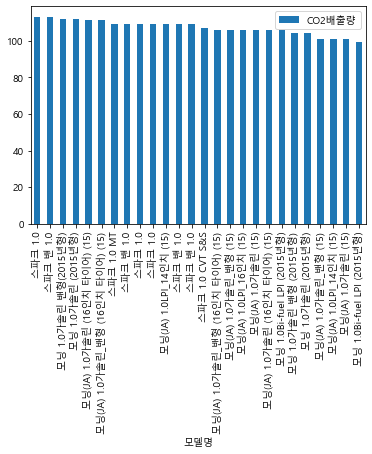

In [60]:
t123=t12.sort_values(by='CO2배출량', ascending=False)
t123.plot(kind='bar')

경차 평균 co2배출량보다 낮은 상위 10개 모델들은 스파크(4개)와 모닝(6개) 시리즈로 나타났다. 또한 유종은 휘발유가 다수(7)였으며, 일부 모닝에서 lpg(3개)가 나타났다.

In [61]:
tiny_co2df2.sort_values(by='CO2배출량',ascending=True).head(10)

,모델명,제조사,유종,CO2배출량
2000,모닝 1.0Bi-fuel LPI (2015년형),기아,LPG,99.0
1983,모닝(JA) 1.0LPI_14인치 (15),기아,LPG,101.0
1988,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,101.0
1991,모닝(JA) 1.0가솔린 (15),기아,휘발유,101.0
2009,모닝 1.0가솔린 밴형 (2015년형),기아,휘발유,104.0
2010,모닝 1.0가솔린 (2015년형),기아,휘발유,104.0
1985,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,106.0
1992,모닝(JA) 1.0가솔린 (15),기아,휘발유,106.0
1987,모닝(JA) 1.0가솔린_밴형 (16인치 타이어) (15),기아,휘발유,106.0
2006,모닝 1.0Bi-fuel LPI (2015년형),기아,LPG,106.0


In [62]:
tiny_co2df2.sort_values(by='CO2배출량',ascending=True).tail(10)

,모델명,제조사,유종,CO2배출량
2002,레이 1.0가솔린 (2015년형),기아,휘발유,128.0
1973,레이 1.0가솔린_밴형 (15),기아,휘발유,129.0
1974,레이 1.0가솔린 (15),기아,휘발유,129.0
1968,"레이 1.0가솔린 (PE, 15인치 타이어)",기아,휘발유,130.0
2004,레이 1.0TCI (2015년형),기아,휘발유,131.0
1984,모닝(JA) 1.0T-GDI_16인치 (15),기아,휘발유,136.0
1976,다마스밴,한국지엠,LPG,146.0
1975,다마스 5인승,한국지엠,LPG,146.0
1977,라보롱카고,한국지엠,LPG,148.0
1978,라보5MT,한국지엠,LPG,148.0


co2배출량이 적은 상위 차종으로 기아 모닝으로 나타났다.    
한편 co2배출량이 높은 차종으로는 한국 지엠의 lpg 차량인 다마스(2), 기아의 레이(5), 스토닉, 모닝(1) 라보(2) 등 다양한 차종이 나타났다.    

## 복합 연비

복합연비 비교에는 전기차도 함께 비교하였다.

In [65]:
tiny_mpg=tiny[['모델명', '제조사','유종', '복합연비']]

In [66]:
tiny_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 392 to 2086
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   모델명     127 non-null    object 
 1   제조사     127 non-null    object 
 2   유종      127 non-null    object 
 3   복합연비    127 non-null    float64
dtypes: float64(1), object(3)
memory usage: 5.0+ KB


In [67]:
tiny_mpg.describe()

,복합연비
count,127.000000
mean,10.041732
std,13.891310
min,1.600000
25%,4.050000
50%,5.600000
75%,13.200000
max,96.200000


In [68]:
tiny_mpg[tiny_mpg['복합연비']>10]

,모델명,제조사,유종,복합연비
392,"스토닉 1.0 T-GDI 7DCT (15""타이어)",기아,휘발유,13.7
395,"스토닉 1.0 T-GDI 7DCT (17""타이어)",기아,휘발유,13.5
1933,넥쏘 수소전기차(17인치타이어),현대,수소,96.2
1934,넥쏘 수소전기차(19인치윈터타이어),현대,수소,91.7
1964,스파크 1.0,한국지엠,휘발유,15.0
1965,스파크 1.0,한국지엠,휘발유,15.0
1966,스파크 밴 1.0,한국지엠,휘발유,15.0
1967,스파크 밴 1.0,한국지엠,휘발유,15.0
1968,"레이 1.0가솔린 (PE, 15인치 타이어)",기아,휘발유,12.7
1969,"레이 1.0가솔린 밴형 (PE, 14인치 타이어)",기아,휘발유,13.0


In [69]:
t2=tiny_mpg[tiny_mpg['복합연비']>10]
t21=t2.set_index("모델명")

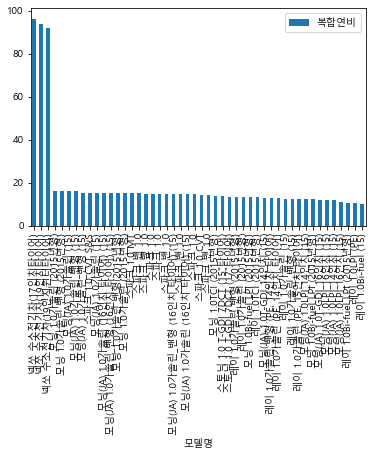

In [70]:
t212=t21.sort_values(by='복합연비', ascending=False)
t212.plot(kind='bar')

경차들의 복합 연비는 평균 10.0으로 나타났다. 평균보다 상위에 해당하는 모델들은 다음과 같다. 

In [71]:
tiny_mpg.sort_values(by='복합연비',ascending=False).head(10)

,모델명,제조사,유종,복합연비
1933,넥쏘 수소전기차(17인치타이어),현대,수소,96.2
2082,넥쏘 수소전기차(19인치타이어),현대,수소,93.7
1934,넥쏘 수소전기차(19인치윈터타이어),현대,수소,91.7
2010,모닝 1.0가솔린 (2015년형),기아,휘발유,16.2
2009,모닝 1.0가솔린 밴형 (2015년형),기아,휘발유,16.2
1988,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,16.0
1991,모닝(JA) 1.0가솔린 (15),기아,휘발유,16.0
1995,스파크 1.0 CVT S&S,한국지엠,휘발유,15.4
1985,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,15.4
1992,모닝(JA) 1.0가솔린 (15),기아,휘발유,15.4


복합 연비는 수소차가 가장 높은 것으로 나타났다. 2위와의 차이가 크며. 2위는 모닝(6)과 스파크(1)가 차지했다.

In [72]:
tiny_mpg.sort_values(by='복합연비',ascending=False).tail(10)

,모델명,제조사,유종,복합연비
2048,Model X 75D,테슬라,전기,3.4
2049,Model X 100D,테슬라,전기,3.4
2050,Model X 100D,테슬라,전기,3.4
2052,Model X 75D,테슬라,전기,3.4
2037,Model X P100D,테슬라,전기,3.1
2036,Model X P100D,테슬라,전기,3.1
2035,Model X P100D,테슬라,전기,3.1
2011,파워프라자 봉고3ev PEACE,기아,전기,2.4
2026,제인모터스칼마토EV1톤내장탑차,제인모터스,전기,2.3
2079,EV SAVER(파워테크닉스 세이버 KNCSZ76ADK803665),파워테크닉스,전기,1.6


연비가 낮은 차량들은 전기차들로 나타났다.

# 소형차

## 소형차 co2배출량

In [79]:
small_co2=small[['모델명','제조사','유종','CO2배출량']]

In [80]:
small_co2['CO2배출량'].describe()

count    258.000000
mean     127.054264
std       23.354920
min       15.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      186.000000
Name: CO2배출량, dtype: float64

In [81]:
small_co2[small_co2['CO2배출량']<127]

,모델명,제조사,유종,CO2배출량
1,"코나 1.6GDI 하이브리드 (18"" 타이어)",현대,휘발유,92.0
2,"코나 1.6GDI 하이브리드 (16"" 타이어)",현대,휘발유,82.0
3,"코나 1.6디젤 2WD (16"" 타이어)",현대,경유,105.0
4,"코나 1.6디젤 2WD (17"" 타이어)",현대,경유,107.0
5,"코나 1.6디젤 2WD (18"" 타이어)",현대,경유,110.0
...,...,...,...,...
1957,니로(DE) 1.6GDI 플러그인 하이브리드_6DCT (15),기아,전기+휘발유,26.0
1958,아이오닉 1.6GDI 플러그인하이브리드_6DCT (15),현대,전기+휘발유,17.0
1959,BMW i8,BMW,전기+휘발유,42.0
1960,CHEVROLET VOLT,GM,전기+휘발유,15.0


In [84]:
t3=small_co2[small_co2['CO2배출량']<127]
t31=t3.set_index("모델명")

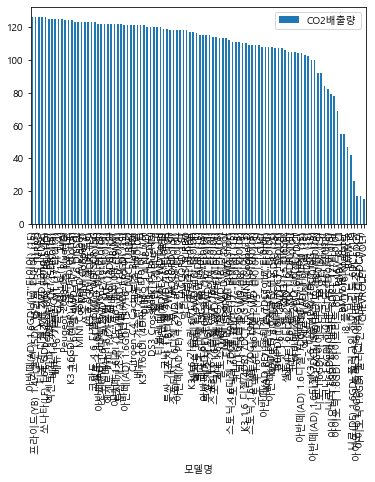

In [86]:
t312=t31.sort_values(by='CO2배출량', ascending=False)
t312.plot(kind='bar')

소형차의 co2배출량은 평균 127로 나타났으며, 평균보다 낮은 배출량을 기록한 모델들은 다음과 같은 것으로 나타났다.

In [87]:
small_co2.sort_values(by='CO2배출량',ascending=True).head(10)

,모델명,제조사,유종,CO2배출량
1960,CHEVROLET VOLT,GM,전기+휘발유,15.0
1958,아이오닉 1.6GDI 플러그인하이브리드_6DCT (15),현대,전기+휘발유,17.0
1939,아이오닉 1.6GDI 플러그인하이브리드 개조차_6DCT,현대,전기+휘발유,17.0
1957,니로(DE) 1.6GDI 플러그인 하이브리드_6DCT (15),기아,전기+휘발유,26.0
1959,BMW i8,BMW,전기+휘발유,42.0
1962,i8 플러그인하이브리드,BMW,전기+휘발유,47.0
1941,BMW i8 Roadster,BMW,전기+휘발유,55.0
1940,BMW i8 LCI,BMW,전기+휘발유,55.0
66,아이오닉 1.6GDI 하이브리드 6DCT_15''타이어,현대,휘발유,69.0
65,아이오닉 1.6GDI 하이브리드 6DCT_17''타이어,현대,휘발유,78.0


배출량은 하이브리드차들이 낮은 것으로 나타났다. 아이오닉(5), 니로(1), bmw i8(3), 쉐보레(1) 등으로 나타났다. 

In [88]:
small_co2.sort_values(by='CO2배출량',ascending=True).tail(10)

,모델명,제조사,유종,CO2배출량
753,"셀토스 1.6T-GDI 4WD (18"" 타이어)",기아,휘발유,155.0
845,"투싼 개조차 1.6T-GDI AWD (18""타이어)",현대,휘발유,157.0
1179,티볼리 가솔린 AT AWD Short,쌍용,휘발유,158.0
848,"투싼 개조차 1.6T-GDI AWD (19""타이어)",현대,휘발유,162.0
1173,CK MINI VAN,DFSK,휘발유,163.0
733,티볼리 가솔린 1.5 AT AWD 기준4,쌍용,휘발유,164.0
884,K01H,DFSK,휘발유,166.0
1177,티볼리 가솔린 AT AWD Long,쌍용,휘발유,167.0
1084,KENBO 600,DFSK,휘발유,173.0
1776,CK MINI TRUCK,DFSK,휘발유,186.0


co2 배출량이 높은 차종으로는 셀토스(1), 티볼리(3), 투싼(2) 등의 모델로 나타났다.

## 복합연비

In [89]:
small_mpg=small[['모델명','제조사','유종','복합연비']]

In [90]:
small_mpg['복합연비'].describe()

count    258.000000
mean      13.787209
std        2.419013
min        9.100000
25%       12.100000
50%       13.300000
75%       15.100000
max       28.300000
Name: 복합연비, dtype: float64

In [91]:
small_mpg[small_mpg['복합연비']>13.7]

,모델명,제조사,유종,복합연비
1,"코나 1.6GDI 하이브리드 (18"" 타이어)",현대,휘발유,17.4
2,"코나 1.6GDI 하이브리드 (16"" 타이어)",현대,휘발유,19.3
3,"코나 1.6디젤 2WD (16"" 타이어)",현대,경유,17.5
4,"코나 1.6디젤 2WD (17"" 타이어)",현대,경유,17.3
5,"코나 1.6디젤 2WD (18"" 타이어)",현대,경유,16.8
...,...,...,...,...
1941,BMW i8 Roadster,BMW,전기+휘발유,17.4
1957,니로(DE) 1.6GDI 플러그인 하이브리드_6DCT (15),기아,전기+휘발유,18.6
1958,아이오닉 1.6GDI 플러그인하이브리드_6DCT (15),현대,전기+휘발유,20.5
1959,BMW i8,BMW,전기+휘발유,14.2


In [93]:
t4=small_mpg[small_mpg['복합연비']>13.7]
t41=t4.set_index("모델명")

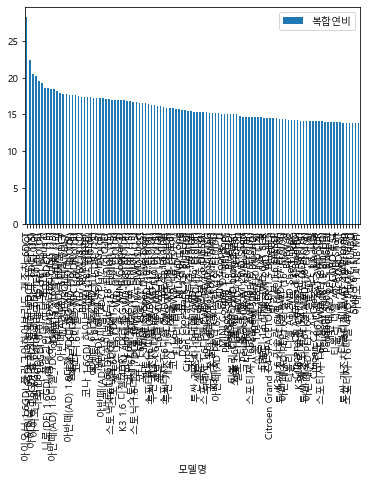

In [94]:
t412=t41.sort_values(by='복합연비', ascending=False)
t412.plot(kind='bar')

소형차들의 평균 복합연비는 13.7로 나타났으며, 평균 이상의 모델들은 다음과 같다.

In [92]:
small_mpg.sort_values(by='복합연비',ascending=True).tail(10)

,모델명,제조사,유종,복합연비
20,QM3 1.5 DIESEL,르노삼성,경유,17.4
1940,BMW i8 LCI,BMW,전기+휘발유,17.4
3,"코나 1.6디젤 2WD (16"" 타이어)",현대,경유,17.5
54,엑센트 1.6디젤 7DCT (4DR) (15),현대,경유,17.6
13,"셀토스 1.6디젤 2WD (16"" 타이어)",기아,경유,17.6
71,아반떼(AD) 1.6디젤_7DCT ISG (17''타이어) (15),현대,경유,17.7
1960,CHEVROLET VOLT,GM,전기+휘발유,17.8
18,아반떼(AD PE) 1.6디젤 7DCT,현대,경유,17.8
73,아반떼(AD) 1.6디젤 (15),현대,경유,17.9
51,엑센트 1.6디젤 (4DR) (15),현대,경유,18.2


연비가 우수한 차량으로는 qm3, bmw i8, 코나, 액센트, 셀토스, 아반떼, 니로 등이 골고루 분포하고 있는 것으로 나타났다. 

In [95]:
small_mpg.sort_values(by='복합연비',ascending=True).head(10)

,모델명,제조사,유종,복합연비
1776,CK MINI TRUCK,DFSK,휘발유,9.1
1084,KENBO 600,DFSK,휘발유,9.7
1177,티볼리 가솔린 AT AWD Long,쌍용,휘발유,10.0
884,K01H,DFSK,휘발유,10.1
733,티볼리 가솔린 1.5 AT AWD 기준4,쌍용,휘발유,10.2
1191,아반떼(AD) 1.6LPI (17'' 타이어) (15),현대,LPG,10.2
1173,CK MINI VAN,DFSK,휘발유,10.3
848,"투싼 개조차 1.6T-GDI AWD (19""타이어)",현대,휘발유,10.4
1192,아반떼(AD) 1.6LPI (15''/16'' 타이어) (15),현대,LPG,10.6
768,아반떼 1.6LPI (15''/16'' 타이어) (19MY),현대,LPG,10.6


하위로는 티볼리, 투싼, 아반떼 등이 있는 것으로 확인되었다.

# 중형차

## 중형차 co2배출량

In [153]:
middle_co2=middle[['모델명','제조사','유종','CO2배출량']]

In [154]:
middle_co2['CO2배출량'].describe()

count    604.000000
mean     148.279470
std       28.949062
min       23.000000
25%      136.000000
50%      151.000000
75%      164.000000
max      289.000000
Name: CO2배출량, dtype: float64

In [155]:
middle_co2[middle_co2['CO2배출량']<148.2]

,모델명,제조사,유종,CO2배출량
0,토요타 Prius AWD,토요타,휘발유,74.0
7,쏘나타(DN8) 2.0GDI 하이브리드_17인치타이어,현대,휘발유,83.0
8,쏘나타(DN8) 2.0GDI 하이브리드_17인치(빌트인캠),현대,휘발유,85.0
9,쏘나타(DN8) 2.0GDI 하이브리드_16인치타이어,현대,휘발유,79.0
10,쏘나타(DN8) 2.0GDI 하이브리드_16인치(빌트인캠),현대,휘발유,80.0
...,...,...,...,...
1954,볼보 XC90T8 AWD,볼보,전기+휘발유,68.0
1955,토요타 Prius Prime,토요타,전기+휘발유,23.0
1956,BMW X5 xDrive 40e iPerformance,BMW,전기+휘발유,89.8
1961,K5 2.0GDI 플러그인 하이브리드(15),기아,전기+휘발유,29.0


In [156]:
t5=middle_co2[middle_co2['CO2배출량']<148.2]
t51=t5.set_index("모델명")

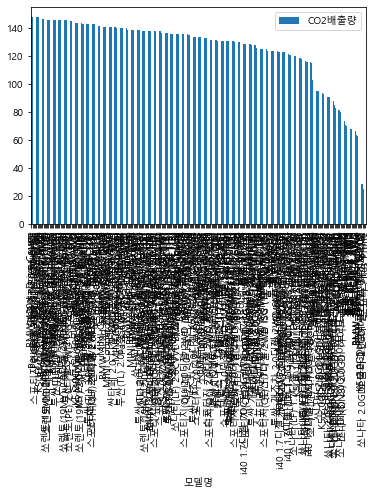

In [157]:
t512=t51.sort_values(by='CO2배출량', ascending=False)
t512.plot(kind='bar')

중형차들의 co2배출량은 148.2로 나타났다.

In [104]:
middle_co2.sort_values(by='CO2배출량',ascending=True).head(10)

,모델명,제조사,유종,CO2배출량
1955,토요타 Prius Prime,토요타,전기+휘발유,23.0
1951,쏘나타 2.0GDI 플러그인 하이브리드 개조차 (15),현대,전기+휘발유,25.0
1963,쏘나타 2.0GDI 플러그인하이브리드,현대,전기+휘발유,29.0
1961,K5 2.0GDI 플러그인 하이브리드(15),기아,전기+휘발유,29.0
1935,E300e,벤츠,전기+휘발유,49.0
1948,BMW 740e iPerformance,BMW,전기+휘발유,54.0
1950,BMW 330e iPerformance,BMW,전기+휘발유,63.0
1937,볼보 S90T8 AWD,볼보,전기+휘발유,64.0
1942,볼보 XC60T8 AWD,볼보,전기+휘발유,67.0
1943,볼보 XC90T8 AWD,볼보,전기+휘발유,68.0


하이브리드차들이 배출량이 낮은 것으로 나타났는데, 토요타 프리우스를 필두로 쏘나타(2), k5, bmw(2)와 볼보(3) 모델인 것으로 확인되었다.

In [105]:
middle_co2.sort_values(by='CO2배출량',ascending=True).tail(10)

,모델명,제조사,유종,CO2배출량
1624,싼타페 2.0T-GDI 4WD 7인 (15),현대,휘발유,203.0
1622,싼타페 2.0T-GDI 4WD 5인 (15),현대,휘발유,203.0
1715,Lincoln MKC 2.0 AWD,포드,휘발유,204.0
1625,쏘렌토 2.0T-GDI 4WD 7인 (15),기아,휘발유,207.0
1621,쏘렌토 2.0T-GDI 4WD 5인 (15),기아,휘발유,207.0
1415,짚 랭글러 루비콘,크라이슬러,휘발유,210.0
1558,레인지로버 이보크 2.0GTDi,랜드로버,휘발유,219.0
1378,디스커버리 SD4,랜드로버,경유,220.0
1877,랜서 에볼루션,미쓰비시,휘발유,235.0
1930,렌서 에볼루션,미쓰비시,휘발유,289.0


배출량 하위 모델들은 미쓰비시 랜서 에볼루션(2), 디스커버리, 레인지 로버, 짚, 쏘렌토(2) 순으로 나타났다.

## 중형차 복합연비

In [106]:
middle_mpg=middle[['모델명','제조사','유종','복합연비']]

In [107]:
middle_mpg['복합연비'].describe()

count    604.000000
mean      12.225497
std        2.396047
min        7.200000
25%       10.475000
50%       12.000000
75%       13.700000
max       22.400000
Name: 복합연비, dtype: float64

In [108]:
middle_mpg[middle_mpg['복합연비']>12.2]

,모델명,제조사,유종,복합연비
0,토요타 Prius AWD,토요타,휘발유,20.9
7,쏘나타(DN8) 2.0GDI 하이브리드_17인치타이어,현대,휘발유,19.1
8,쏘나타(DN8) 2.0GDI 하이브리드_17인치(빌트인캠),현대,휘발유,18.8
9,쏘나타(DN8) 2.0GDI 하이브리드_16인치타이어,현대,휘발유,20.1
10,쏘나타(DN8) 2.0GDI 하이브리드_16인치(빌트인캠),현대,휘발유,19.8
...,...,...,...,...
1951,쏘나타 2.0GDI 플러그인 하이브리드 개조차 (15),현대,전기+휘발유,17.1
1953,C350 e,벤츠,전기+휘발유,16.9
1955,토요타 Prius Prime,토요타,전기+휘발유,21.4
1961,K5 2.0GDI 플러그인 하이브리드(15),기아,전기+휘발유,16.4


In [109]:
t6=middle_mpg[middle_mpg['복합연비']>12.2]
t61=t6.set_index("모델명")

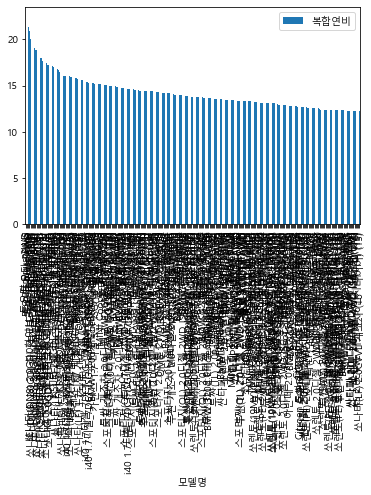

In [110]:
t612=t61.sort_values(by='복합연비', ascending=False)
t612.plot(kind='bar')

중형차 복합 연비의 평균은 12.2 인 것으로 나타났다. 

In [111]:
middle_mpg.sort_values(by='복합연비',ascending=True).head(10)

,모델명,제조사,유종,복합연비
1569,올란도 2.0 LPG 7인승,한국지엠,LPG,7.2
1581,올란도 2.0 LPG 5인승,한국지엠,LPG,7.2
1877,랜서 에볼루션,미쓰비시,휘발유,7.6
1558,레인지로버 이보크 2.0GTDi,랜드로버,휘발유,7.8
1726,"카렌스 2.0LPI 18""타이어(17MY) (15)",기아,LPG,8.0
1930,렌서 에볼루션,미쓰비시,휘발유,8.1
1625,쏘렌토 2.0T-GDI 4WD 7인 (15),기아,휘발유,8.2
1621,쏘렌토 2.0T-GDI 4WD 5인 (15),기아,휘발유,8.2
1415,짚 랭글러 루비콘,크라이슬러,휘발유,8.2
1622,싼타페 2.0T-GDI 4WD 5인 (15),현대,휘발유,8.3


올란도, 랜서 에볼루션, 레인지 로버 등의 모델의 연비가 제일 낮은 것으로 나타났다.

In [112]:
middle_mpg.sort_values(by='복합연비',ascending=True).tail(10)

,모델명,제조사,유종,복합연비
29,ACCORD HYBRID,혼다,휘발유,18.9
30,ACCORD HYBRID,혼다,휘발유,18.9
7,쏘나타(DN8) 2.0GDI 하이브리드_17인치타이어,현대,휘발유,19.1
55,ACCORD HYBRID,혼다,휘발유,19.3
10,쏘나타(DN8) 2.0GDI 하이브리드_16인치(빌트인캠),현대,휘발유,19.8
9,쏘나타(DN8) 2.0GDI 하이브리드_16인치타이어,현대,휘발유,20.1
0,토요타 Prius AWD,토요타,휘발유,20.9
1955,토요타 Prius Prime,토요타,전기+휘발유,21.4
62,토요타 PRIUS,토요타,휘발유,21.9
15,토요타 Prius 2WD,토요타,휘발유,22.4


쏘나타 하이브리드차가 공동 1위로 나타났으나, 이후의 상위권 모델들은 k5, 프리우스, 쏘나타 등 휘발유 차량으로 확인되었다.

# 대형차

## 대형차 co2 배출량

In [113]:
big_co2=big[['모델명','제조사','유종','CO2배출량']]

In [114]:
big_co2['CO2배출량'].describe()

count    1098.000000
mean      203.597450
std        46.100323
min        63.000000
25%       175.000000
50%       199.000000
75%       225.000000
max       522.000000
Name: CO2배출량, dtype: float64

In [115]:
big_co2[big_co2['CO2배출량']<203.5]

,모델명,제조사,유종,CO2배출량
6,"K7 2.4하이브리드 (PE/17""타이어)",기아,휘발유,97.0
17,토요타 Camry Hybrid LE,토요타,휘발유,92.0
23,토요타 Avalon Hybrid,토요타,휘발유,96.0
24,렉서스 ES300h,토요타,휘발유,93.0
39,토요타 CAMRY Hybrid,토요타,휘발유,102.0
...,...,...,...,...
1914,911 카레라 S 카브리올레,포르쉐,휘발유,193.0
1915,911 카레라 카브리올레,포르쉐,휘발유,191.0
1936,BMW 745Le iPerformance,BMW,전기+휘발유,63.0
1938,BMW 745e iPerformance,BMW,전기+휘발유,63.0


In [116]:
t7=big_co2[big_co2['CO2배출량']<203.5]
t71=t7.set_index("모델명")

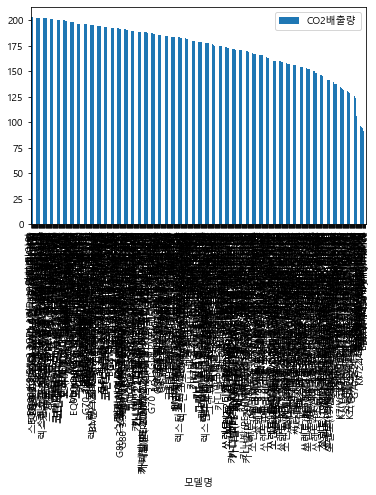

In [117]:
t712=t71.sort_values(by='CO2배출량', ascending=False)
t712.plot(kind='bar')

대형차의 co2 배출량 평균은 203.5 인 것으로 나타났다.

In [119]:
big_co2.sort_values(by='CO2배출량',ascending=True).head(10)

,모델명,제조사,유종,CO2배출량
1936,BMW 745Le iPerformance,BMW,전기+휘발유,63.0
1938,BMW 745e iPerformance,BMW,전기+휘발유,63.0
1949,파나메라 4 E-하이브리드,포르쉐,전기+휘발유,74.0
17,토요타 Camry Hybrid LE,토요타,휘발유,92.0
24,렉서스 ES300h,토요타,휘발유,93.0
52,토요타 Camry Hybrid,토요타,휘발유,95.0
53,토요타 CAMRY Hybrid LE,토요타,휘발유,95.0
23,토요타 Avalon Hybrid,토요타,휘발유,96.0
6,"K7 2.4하이브리드 (PE/17""타이어)",기아,휘발유,97.0
57,그랜저 2.4 하이브리드 (15),현대,휘발유,97.0


bmw(2), 파나메라(1), 도요타 캠리(4), 렉서스(1) 모델들이 co2 배출량이 낮은 것으로 나타났다.

In [120]:
big_co2.sort_values(by='CO2배출량',ascending=True).tail(10)

,모델명,제조사,유종,CO2배출량
1864,Aventador LP700-4 Roadster,람보르기니,휘발유,346.0
1919,Aventador LP700-4,람보르기니,휘발유,346.0
1663,페라리 GTC4Lusso,페라리,휘발유,346.0
1858,Aventador LP720-4,람보르기니,휘발유,350.0
1931,Gallardo LP560-4,람보르기니,휘발유,359.0
1327,Aventador SVJ Coupe,람보르기니,휘발유,398.0
1307,Aventador SVJ Roadster,람보르기니,휘발유,405.0
1385,Aventador S Roadster,람보르기니,휘발유,408.0
1386,Aventador S Coupe,람보르기니,휘발유,408.0
1918,Aventador LP700-4,람보르기니,휘발유,522.0


배출량 상위 차종으로는 람보르기니, 롤스로이스 등의 스포츠, 고급차 메이커의 모델들이 차지하였다.

## 대형차 복합연비

In [121]:
big_mpg=big[['모델명','제조사','유종','복합연비']]

In [122]:
big_mpg['복합연비'].describe()

count    1098.000000
mean        9.383151
std         2.207681
min         4.400000
25%         7.900000
50%         9.100000
75%        10.700000
max        17.500000
Name: 복합연비, dtype: float64

In [123]:
big_mpg[big_mpg['복합연비']>9.3]

,모델명,제조사,유종,복합연비
6,"K7 2.4하이브리드 (PE/17""타이어)",기아,휘발유,16.2
17,토요타 Camry Hybrid LE,토요타,휘발유,17.5
23,토요타 Avalon Hybrid,토요타,휘발유,16.6
24,렉서스 ES300h,토요타,휘발유,17.0
39,토요타 CAMRY Hybrid,토요타,휘발유,16.4
...,...,...,...,...
1263,아웃랜더,미쓰비시,휘발유,9.5
1269,짚 컴패스,크라이슬러,휘발유,10.0
1936,BMW 745Le iPerformance,BMW,전기+휘발유,14.2
1938,BMW 745e iPerformance,BMW,전기+휘발유,14.2


In [124]:
t8=big_mpg[big_mpg['복합연비']>9.3]
t81=t8.set_index("모델명")

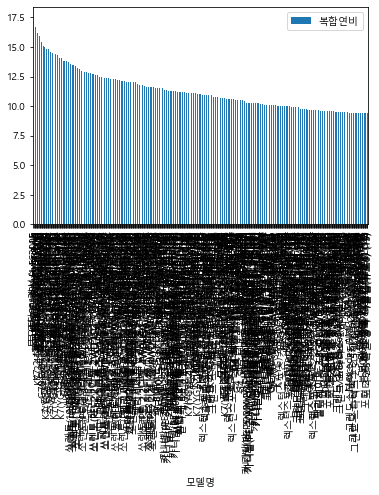

In [125]:
t812=t81.sort_values(by='복합연비', ascending=False)
t812.plot(kind='bar')

대형차의 복합연비 평균은 9.3인 것으로 나타났다.

In [127]:
big_mpg.sort_values(by='복합연비',ascending=True).tail(10)

,모델명,제조사,유종,복합연비
99,토요타 RAV4 Hybrid 2WD,토요타,휘발유,15.9
59,"K7 2.4하이브리드 (17""타이어) (15)",기아,휘발유,16.2
57,그랜저 2.4 하이브리드 (15),현대,휘발유,16.2
6,"K7 2.4하이브리드 (PE/17""타이어)",기아,휘발유,16.2
39,토요타 CAMRY Hybrid,토요타,휘발유,16.4
23,토요타 Avalon Hybrid,토요타,휘발유,16.6
52,토요타 Camry Hybrid,토요타,휘발유,16.7
24,렉서스 ES300h,토요타,휘발유,17.0
53,토요타 CAMRY Hybrid LE,토요타,휘발유,17.5
17,토요타 Camry Hybrid LE,토요타,휘발유,17.5


상위로는 토요타의 모델들이 주로 차지하는 것으로 나타났다.

In [126]:
big_mpg.sort_values(by='복합연비',ascending=True).head(10)

,모델명,제조사,유종,복합연비
1386,Aventador S Coupe,람보르기니,휘발유,4.4
1307,Aventador SVJ Roadster,람보르기니,휘발유,4.4
1385,Aventador S Roadster,람보르기니,휘발유,4.4
1918,Aventador LP700-4,람보르기니,휘발유,4.5
1327,Aventador SVJ Coupe,람보르기니,휘발유,4.5
1858,Aventador LP720-4,람보르기니,휘발유,5.2
1663,페라리 GTC4Lusso,페라리,휘발유,5.2
1775,Mercedes-AMG G63,벤츠,휘발유,5.2
1518,Huracan LP610-4 Spyder,람보르기니,휘발유,5.3
1864,Aventador LP700-4 Roadster,람보르기니,휘발유,5.3


복합연비는 람보르기니의 모델들이 대부분 하위인 것으로 나타났다.

# 경차 회귀분석

경차를 복합연비 중심으로 한 가격과의 상관관계를 알아보기 위해, 복합연비 상위 30개를 대상으로 하여 가격을 조사, 추가하였다. 

In [128]:
dft=pd.read_csv('경차 수정.csv', encoding='utf-8')

In [223]:
dft

,Unnamed: 0,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
0,1985,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,998,자동4,15.4,경형,106,경차,1180
1,1992,모닝(JA)1.0가솔린 (15),기아,휘발유,998,자동4,15.4,경형,106,경차,1195
2,1993,모닝(JA) 1.0가솔린 (16인치 타이어) (15),기아,휘발유,998,수동5,15.3,경형,106,경차,1234
3,1987,모닝(JA) 1.0가솔린_밴형 (16인치 타이어) (15),기아,휘발유,998,수동5,15.3,경형,106,경차,1280
4,1967,스파크 밴 1.0,한국지엠,휘발유,999,수동5,15.0,경형,109,경차,1020
5,1966,스파크 밴 1.0,한국지엠,휘발유,999,무단변속,15.0,경형,109,경차,1060
6,1965,스파크 1.0,한국지엠,휘발유,999,수동5,15.0,경형,109,경차,1030
7,1964,스파크 1.0,한국지엠,휘발유,999,무단변속,15.0,경형,109,경차,1058
8,1994,스파크 1.0,한국지엠,휘발유,999,자동5,14.7,경형,113,경차,1125
9,1990,모닝(JA) 1.0가솔린 (16인치 타이어) (15),기아,휘발유,998,자동4,14.7,경형,111,경차,1195


In [129]:
n=len(dft)
n

30

30개의 표본으로 회귀분석을 실시하였다.

그전에 앞서, 산점도로 각 변수들을 비교하였다.

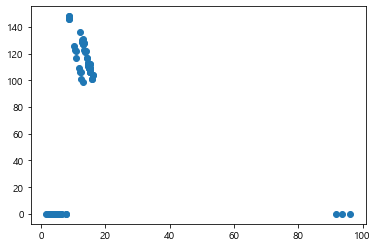

In [131]:
plt.scatter(tiny['복합연비'],tiny['CO2배출량'])

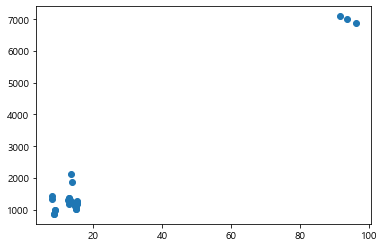

In [132]:
plt.scatter(dft['복합연비'],dft['가격'])

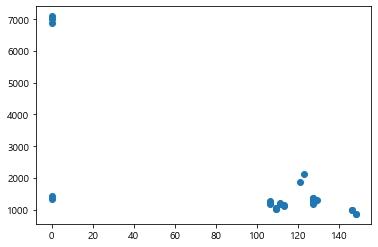

In [133]:
plt.scatter(dft['CO2배출량'],dft['가격'])

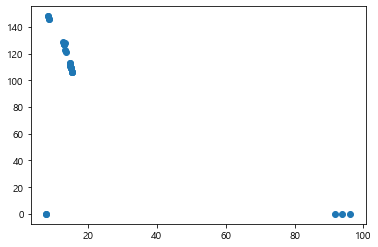

In [134]:
plt.scatter(dft['복합연비'],dft['CO2배출량'])

이중 가격과 복합연비 간의 상관관계를 알아보기로 하였으며, 가격에 대한 이상치 확인을 실시하였다.

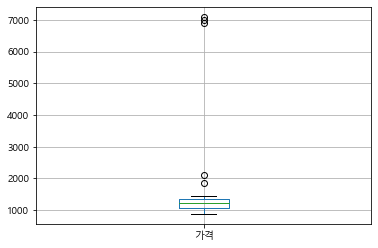

In [135]:
boxplot=dft.boxplot(column=['가격'])
plt.show()

이상치가 유독 높이 나온 것을 확인한 결과, 수소차인 것을 확인하였다. 수소차의 경우, 전국에 운영 중인 충전소가 26곳에 불과한 점과 비싼 구입 비용 등, 경제성과 접근성이 떨어진다고 판단하여 제거하였다. 

In [137]:
dft_x=dft.drop([17,18,19])

In [138]:
dft_x

,Unnamed: 0,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
0,1985,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,998,자동4,15.4,경형,106,경차,1180
1,1992,모닝(JA)1.0가솔린 (15),기아,휘발유,998,자동4,15.4,경형,106,경차,1195
2,1993,모닝(JA) 1.0가솔린 (16인치 타이어) (15),기아,휘발유,998,수동5,15.3,경형,106,경차,1234
3,1987,모닝(JA) 1.0가솔린_밴형 (16인치 타이어) (15),기아,휘발유,998,수동5,15.3,경형,106,경차,1280
4,1967,스파크 밴 1.0,한국지엠,휘발유,999,수동5,15.0,경형,109,경차,1020
5,1966,스파크 밴 1.0,한국지엠,휘발유,999,무단변속,15.0,경형,109,경차,1060
6,1965,스파크 1.0,한국지엠,휘발유,999,수동5,15.0,경형,109,경차,1030
7,1964,스파크 1.0,한국지엠,휘발유,999,무단변속,15.0,경형,109,경차,1058
8,1994,스파크 1.0,한국지엠,휘발유,999,자동5,14.7,경형,113,경차,1125
9,1990,모닝(JA) 1.0가솔린 (16인치 타이어) (15),기아,휘발유,998,자동4,14.7,경형,111,경차,1195


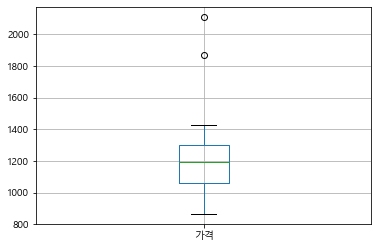

In [139]:
boxplot=dft_x.boxplot(column=['가격'])
plt.show()

나머지 2개의 이상치는 단순히 가격이 높은 것으로 확인되어서 그대로 유지하기로 하였다.

In [140]:
x=np.array(dft_x['복합연비'])
y=np.array(dft_x['가격'])
p=1

이후 해당 데이터 프레임으로 회귀분석을 실시하였다.

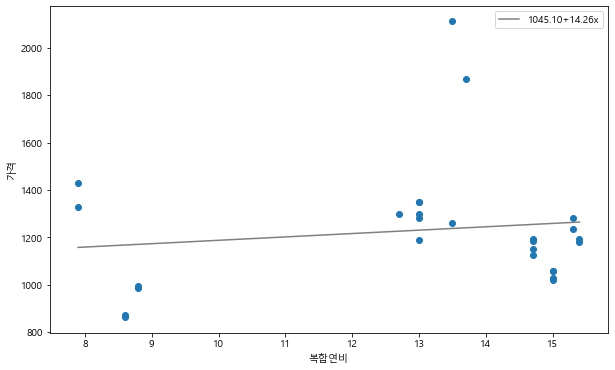

In [141]:
poly_fit=np.polyfit(x, y, 1)
poly_1d=np.poly1d(poly_fit)
xs=np.linspace(x.min(),x.max())
ys=poly_1d(xs)

fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.set_xlabel('복합연비')
ax.set_ylabel('가격')
ax.plot(xs,ys,color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x,y)
ax.legend()

plt.show()

In [142]:
formula='복합연비~가격'
result=smf.ols(formula,dft_x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   복합연비   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.5026
Date:                Fri, 03 Jul 2020   Prob (F-statistic):              0.485
Time:                        02:17:54   Log-Likelihood:                -63.399
No. Observations:                  27   AIC:                             130.8
Df Residuals:                      25   BIC:                             133.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2341      2.450      4.586      0.000       6.188      16.280
가격             0.0014      0.002      0.709      0.485      -0.003       0.005
==============================================================================
Omnibus:                        4.202   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                3.738
Skew:                          -0.861   Prob(JB):                        0.154
Kurtosis:                       2.401   Cond. No.                     6.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
corr=stats.pearsonr(dft_x.복합연비, dft_x.가격)
corr

(0.14038069216400967, 0.4849309788293205)

분석 결과 약한 양의 상관관계가 나왔으며, p값은 0.05를 크게 초과하는 것으로 나왔다. 따라서 복합연비와 차량의 가격간에는 상관관계가 없는 것으로 나타났다.

# 결과 분석

차량의 가격 설정은 복합연비 뿐만 아니라 차량에 설치된 다양한 부품이나 디자인, 브랜드 파워 등 다양한 요소가 결합되는 사치재적인 성격이 있다.    

차량은 본질적으로 운송수단인 만큼, 연비와 가격의 상관관계가 클 것이라고 가정하고 진행하였으나, 실제로는 그렇지 않다는 결과가 나왔다.   

이를 바탕으로 차량의 가격 결정 요소에는 연비의 비중이 생각보다 크지 않다는 점을 확인할 수 있었으며, 차량 구매 고려 요인 선정에 있어서도 여러 요소를 고려해야 보다 더 정확한 근사치를 얻을 수 있을 것으로 보인다.

# 기타

기존에 삭제했던 이상치를 유지한 체로 분석을 실시하였을 시에, 모델링까지 생성이 가능한 것으로 확인되었다.

In [240]:
x=np.array(dft['복합연비'])
y=np.array(dft['가격'])
p=1

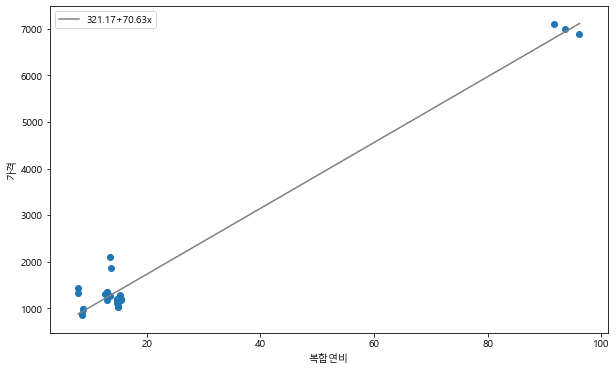

In [241]:
poly_fit=np.polyfit(x, y, 1)
poly_1d=np.poly1d(poly_fit)
xs=np.linspace(x.min(),x.max())
ys=poly_1d(xs)

fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.set_xlabel('복합연비')
ax.set_ylabel('가격')
ax.plot(xs,ys,color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x,y)
ax.legend()

plt.show()

In [242]:
formula='복합연비~가격'
result=smf.ols(formula,dft).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   복합연비   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1001.
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           1.85e-23
Time:                        13:41:22   Log-Likelihood:                -84.357
No. Observations:                  30   AIC:                             172.7
Df Residuals:                      28   BIC:                             175.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8513      1.094     -3.519      0.001      -6.093      -1.610
가격             0.0138      0.000     31.634      0.000       0.013       0.015
==============================================================================
Omnibus:                        9.909   Durbin-Watson:                   0.881
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.465
Skew:                          -1.190   Prob(JB):                       0.0145
Kurtosis:                       4.051   Cond. No.                     3.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
corr=stats.pearsonr(dft.복합연비, dft.가격)

In [145]:
corr

(0.9862968551767062, 1.8542745817397547e-23)

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
x=dft['복합연비']
y=dft['가격']

In [148]:
line=LinearRegression()
line.fit(x.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
line.predict([[10]])

array([1027.446])

In [150]:
line.coef_

array([70.628])

In [151]:
line.intercept_

321.16937257078393

생성된 모델식은 다음과 같다.

### y=70.628x+321.16937257078393

# 국내 유류가

In [250]:
gas=pd.read_csv('제품별_주유소_가격_20200701143804.csv',encoding='cp949')

In [251]:
gas

,제품별,2018. 01,2018. 02,2018. 03,2018. 04,2018. 05,2018. 06,2018. 07,2018. 08,2018. 09,...,2019. 03,2019. 04,2019. 05,2019. 06,2019. 07,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12
0,무연보통휘발유,1551.76,1564.55,1557.85,1551.33,1580.29,1609.08,1610.91,1618.29,1637.58,...,1369.52,1424.39,1517.22,1517.54,1491.50,1493.72,1529.27,1540.47,1535.65,1548.47
1,실내등유,896.48,909.49,908.93,906.95,918.85,938.83,942.17,946.57,959.88,...,943.86,957.81,972.46,973.43,969.23,967.96,968.84,973.08,971.83,970.78
2,자동차용 경유,1344.93,1360.41,1354.58,1349.06,1380.24,1410.01,1411.85,1419.13,1438.93,...,1269.16,1316.42,1385.31,1379.77,1352.84,1351.92,1379.84,1387.73,1380.51,1385.42


데이터를 불러온 시점에서 의미가 없는 것으로 결정되어 중지하였다.